# Exploratory Data Analysis (EDA) on Titanic Dataset.


### **Introduction**

The Titanic dataset contains information about passengers aboard the RMS Titanic, which sank in 1912.  
This project explores the Titanic dataset to understand the factors that influenced survival rates on the Titanic. Through Exploratory Data Analysis (EDA), key insights regarding the passengers' characteristics, such as gender, age, class, and fare, are derived.

### **Description**
### Dataset Variables  

| Variable      | Definition                    | Key                                  |
|--------------|--------------------------------|--------------------------------------|
| PassengerId  | Passenger ID                  | -                                    |
| Survived     | Survival status               | 0 = No, 1 = Yes                      |
| Pclass       | Ticket class                   | 1 = 1st, 2 = 2nd, 3 = 3rd            |
| Name         | Name of passenger              | -                                    |
| Sex          | Sex                            | Female, Male                         |
| Age          | Age in years                   | -                                    |
| SibSp        | # of siblings/spouses aboard   | -                                    |
| Parch        | # of parents/children aboard   | -                                    |
| Ticket       | Ticket number                  | -                                    |
| Fare         | Passenger fare                 | -                                    |
| Cabin        | Cabin number                   | -                                    |
| Embarked     | Port of Embarkation            | C = Cherbourg, Q = Queenstown, S = Southampton |


###  Objective  
The goal of this analysis is to:
- Understand the structure of the dataset.
- Identify patterns and missing data.
- Explore relationships between different variables.
- Find the key features that influenced survival. 

In [1]:
#importing some of necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### 1) Load the Dataset to undertand the **first Objective** i.e to know about the **Structure and its Featured**

In [54]:
url="https://raw.githubusercontent.com/manisang89/Titanic_EDA/main/Titanic-Dataset.csv"
titanic=pd.read_csv(url)

In [52]:
print(titanic.head())

   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S
4            5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500   NaN        S


#### Structure of the Dataset

In [4]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


### 2) **Data Cleaning** and **Preprocessing**

Check for columns which do not contribute which have no significant important 
such rows are
- PassengerId - it's some unique id so not required
- Name - it's not required as we are not doing any analysis on name
- Ticket - it's not required as we are not doing any analysis on Ticket no

lets drop those columns\
**Note**- i tried to create a separate copy just for safe purpose


In [5]:
titanic_dropped=titanic.copy()

In [6]:
titanic_dropped.drop(columns=['PassengerId','Name','Ticket'],inplace=True)

In [7]:
titanic_dropped.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


#### Check for null values

In [8]:
titanic_dropped.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

- we find there are null values in three columns [**Age, Cabin, Embarked**].
- Lets clean the data by using standard ways

In [9]:
((titanic['Age'].isnull().sum())/len(titanic))*100

19.865319865319865

we find that 19.8% of data in Age is missing as it is signifacnt. so lets see if it important or not


In [10]:
#find correlation

corrleation=titanic['Age'].corr(titanic['Survived'])
print(corrleation)

-0.07722109457217756


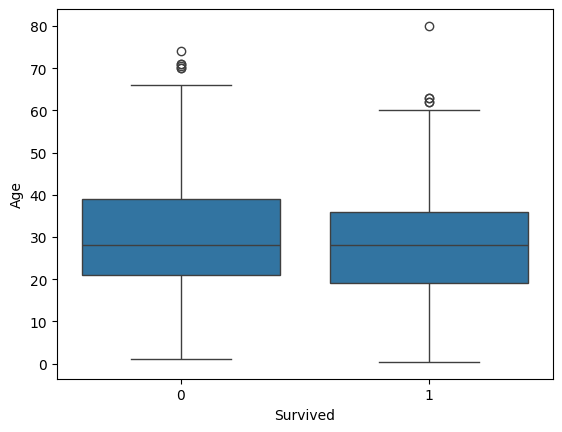

In [11]:
sns.boxplot(x=titanic['Survived'],y=titanic['Age'],)
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()


Insights
- one is there are outliers above Age > 70 but it's for both the classes
- cannot fill it with mean as it could disturb the data
- the data is uniformly spread, and correlation is nearly zero so Age alone cannot influence Survival alone.


so lets vizualize Pclass with Age with Sex as differentiator

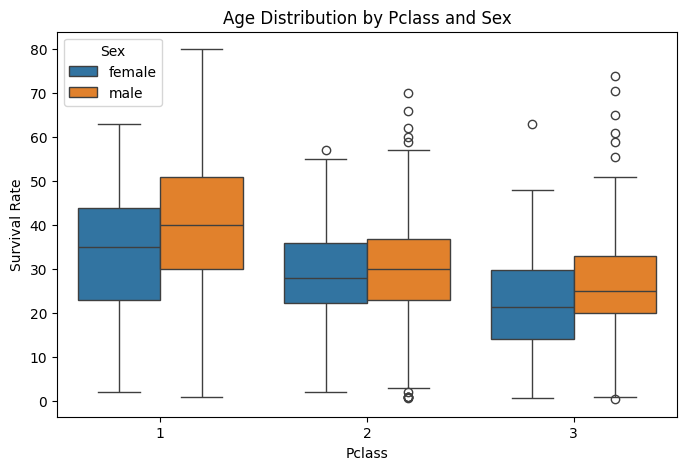

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Pclass", y="Age", hue="Sex", data=titanic_dropped)
plt.title("Age Distribution by Pclass and Sex")
plt.ylabel("Survival Rate")
plt.show()

Insights

- we see the age varies with Pclass
- we see more males than females in each classes
- so better not to fill the null values by taking median as whole lets fill **Age** based on **median** based on **(Pclass and Sex)**

In [13]:
titanic_dropped['Age']=titanic_dropped.groupby(['Pclass','Sex'])['Age'].transform(lambda x:x.fillna(x.median()))

In [14]:
titanic_dropped.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [15]:
titanic_dropped['Age'].isnull().sum()

0

we successfully cleaned and filled **Age** column\
now lets look at **Embarked**

In [16]:
titanic_dropped['Embarked'].isnull().sum()

2

In [17]:
((titanic_dropped['Embarked'].isnull().sum())/len(titanic_dropped))*100

0.22446689113355783

Insights
-  the % and number is very less so either we can drop the rows or fill it with most frequent(mode of the column) as it categorical value
- I will use mode.

In [18]:
titanic_dropped['Embarked'].fillna(titanic_dropped['Embarked'].mode()[0],inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_7676\3965021138.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_dropped['Embarked'].fillna(titanic_dropped['Embarked'].mode()[0],inplace=True)


In [19]:
titanic_dropped['Embarked'].isnull().sum()

0

Done and only left with **Cabin**


In [20]:
titanic_dropped['Cabin'].isnull().sum()

687

In [21]:
((titanic_dropped['Cabin'].isnull().sum())/len(titanic_dropped))*100

77.10437710437711

Insights
- it has 77% of data as null values and being a categorical value it may not be useful in **to predict Survive**
- best option drop the column

In [22]:
titanic_dropped.drop(columns=['Cabin'],inplace=True)

In [23]:
titanic_dropped.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


After cleaning and handling missing values, we're done with **Data Cleaning & Preprocessing**.

### 3) Data Exploration (Univariate & Bivariate Analysis)

#### - Univariate Analysis
lets analyze and visualize each column to find Insights

**Survived column**

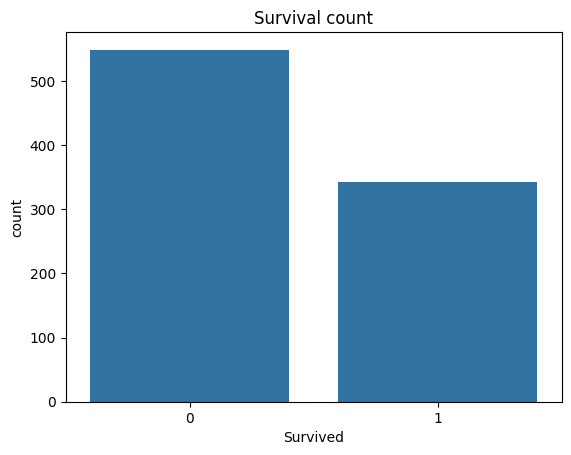

In [24]:
sns.countplot(data=titanic_dropped,x='Survived')
plt.title('Survival count')
plt.show()

Insights
- people not survived are nearly 520
-people survived are nearly 320

**Pclass column**

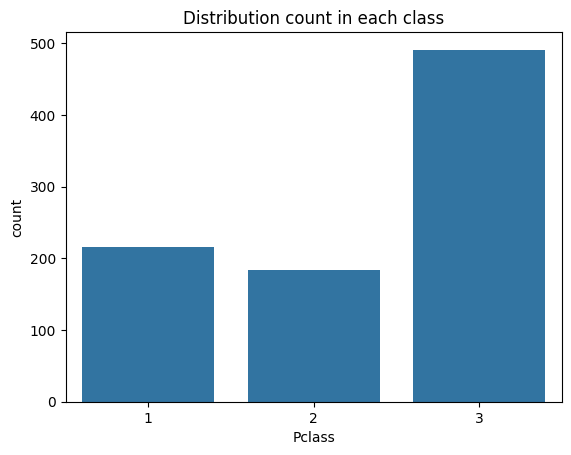

In [25]:
sns.countplot(data=titanic_dropped,x='Pclass')
plt.title("Distribution count in each class")
plt.show()


Insight
- we see the people travelling in third class are more [third > first > second]

**Sex columns**

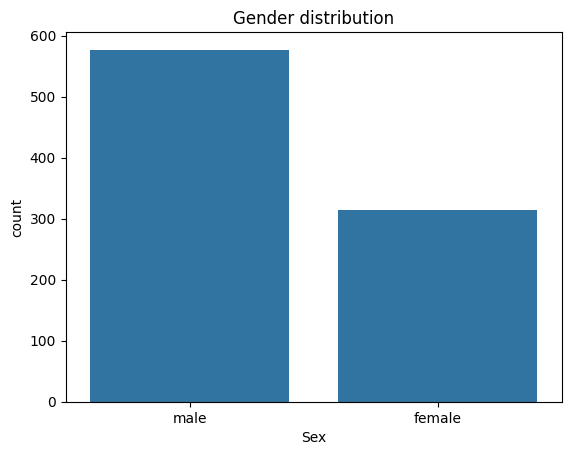

In [26]:
sns.countplot(x='Sex',data=titanic_dropped)
plt.title("Gender distribution")
plt.show()


Insight
- males are more in number than female

**Age Column**

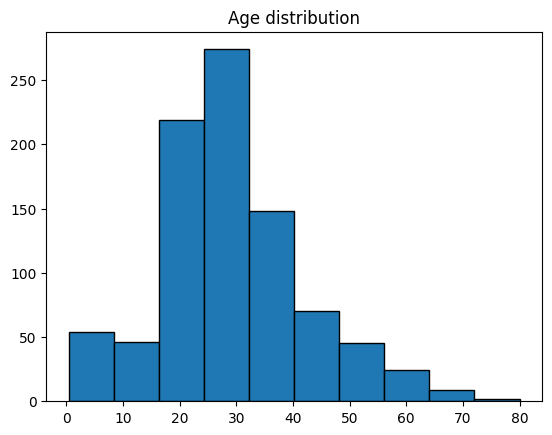

In [27]:
plt.hist(x='Age',data=titanic_dropped,edgecolor='black')
plt.title('Age distribution')
plt.show()

Insights

The graph is Right-Skewed which result:

- Majority of people in Age of [20-40]
- This states people in the ship are mostly youth and middle-aged people
- The old people are less in number

sibSp column(siblings)

In [28]:
titanic_dropped['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

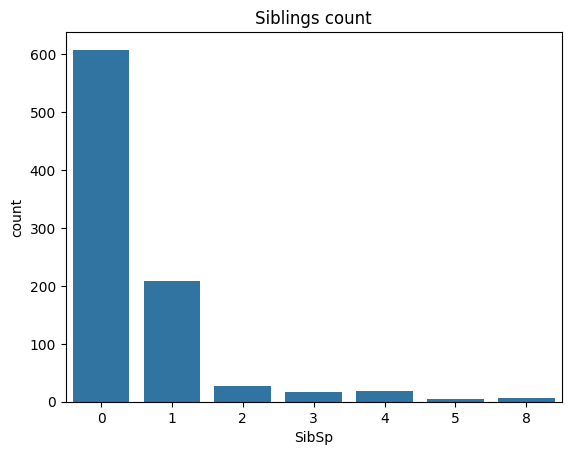

In [29]:
sns.countplot(x='SibSp',data=titanic_dropped)
# sns.countplot(x='Parch',data=titanic_dropped)
plt.title("Siblings count")
plt.show()

Insights

- Most passengers traveled alone(no siblings) (SibSp = 0).
- Few had large families

Parch column

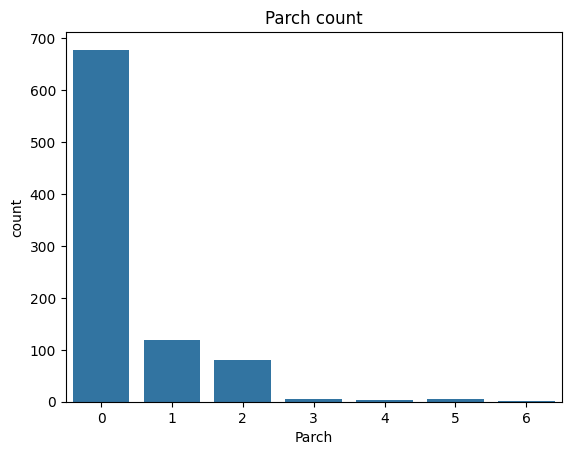

In [30]:
sns.countplot(x='Parch',data=titanic_dropped)
plt.title("Parch count")
plt.show()

Insights
- This further adds to SibSp that passengers travelled alone are more.

Fare column

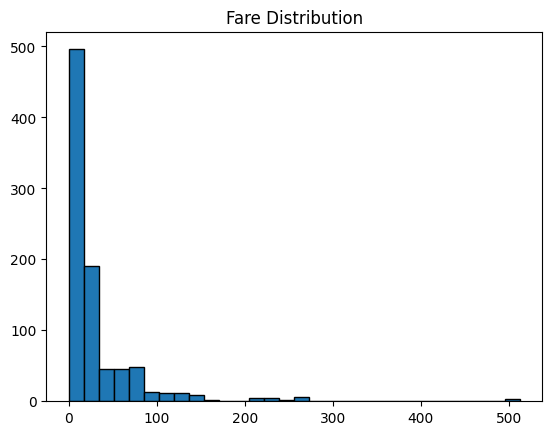

In [31]:
plt.hist(x="Fare",data=titanic_dropped,edgecolor="black",bins=30)
plt.title("Fare Distribution")
plt.show()

just looking at this is not much informative so later we try to vizualize with other variables

Embarked column

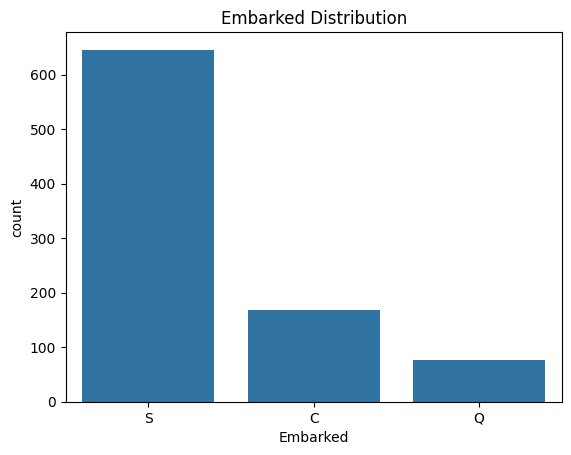

In [32]:
sns.countplot(x="Embarked",data=titanic_dropped)
plt.title("Embarked Distribution")
plt.show()

Insights
- Majority of passengers boarded from Southampton (S) 
- Cherbourg (C) had a decent number
- Queenstown (O) had the least 

### - Bivariate analysis

#### Survival vs other features

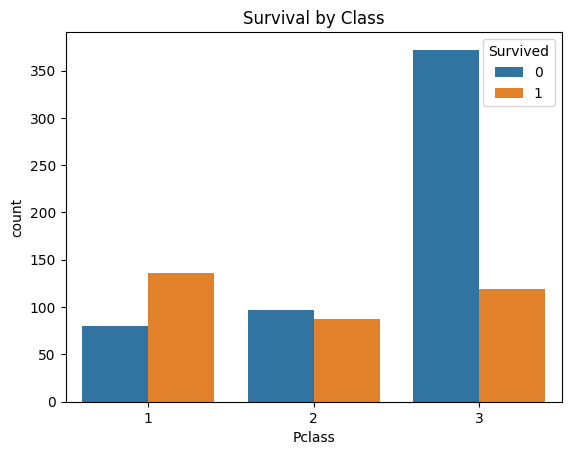

In [33]:
sns.countplot(x='Pclass',hue='Survived',data=titanic_dropped)
plt.title('Survival by Class')
plt.show()

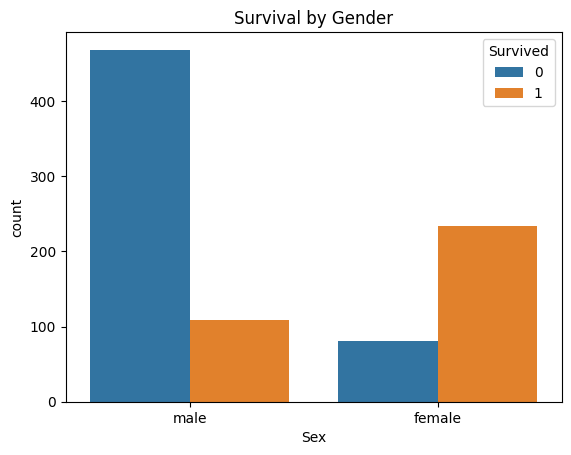

In [34]:
sns.countplot(x='Sex',hue='Survived',data=titanic_dropped)
plt.title('Survival by Gender')
plt.show()

Insights:
- Women had a much higher survival rate than men.

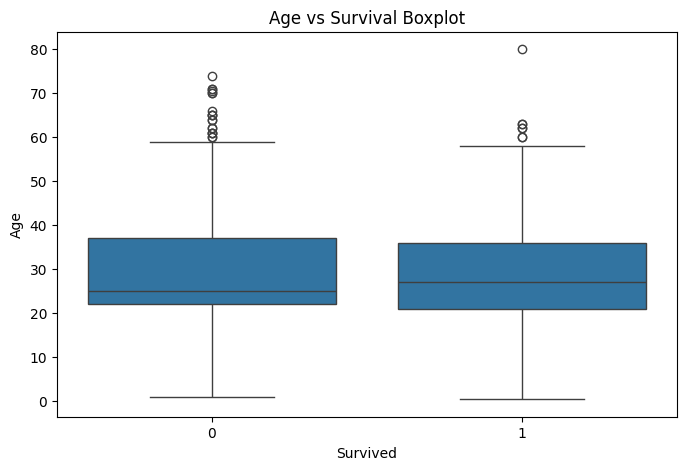

In [35]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Age', data=titanic_dropped)
plt.title("Age vs Survival Boxplot")
plt.show()


Insights:
- the median of survived is greater than non-survived
- which says that older people had high chance of survival than young and children
- and before this we found that older people had more survival rate 
- which gives another insight that people travelled in class 1 are mostly older people

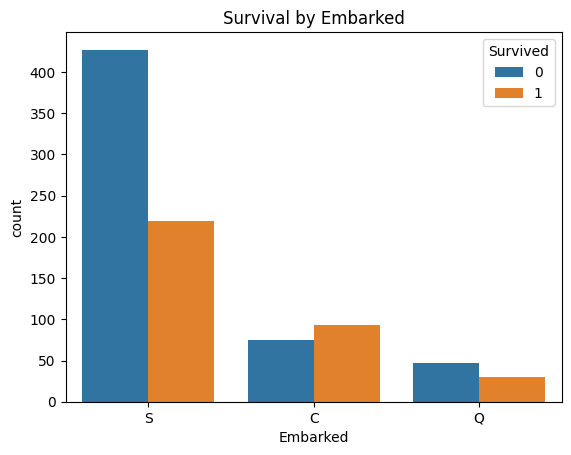

In [36]:
sns.countplot(x='Embarked',hue='Survived',data=titanic_dropped)
plt.title('Survival by Embarked')
plt.show()

In [37]:
titanic_dropped.groupby("Embarked")["Survived"].mean()


Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

Insights:
- this graph says port s boarded people had high survival rate
- but the mean value say port c had high survival rate
- **there is a constrast between**
- lets further do some more and then conclude on it.

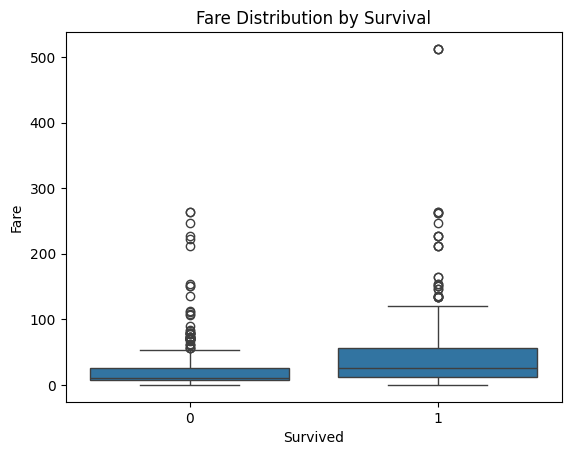

In [38]:
sns.boxplot(x="Survived", y="Fare", data=titanic_dropped)
plt.title("Fare Distribution by Survival")
plt.show()


Insights:
- median fare for survivors is higher, it means higher-paying passengers had better survival chances.
- which again links to class 1 people
- outlier says some really paid very high and other paid very low fares

Insight:
- First-class passengers had a higher survival rate.

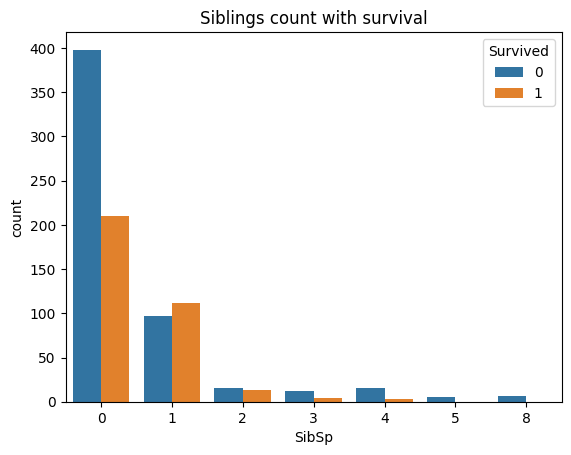

In [39]:
sns.countplot(x='SibSp',hue='Survived',data=titanic_dropped)
plt.title('Siblings count with survival')
plt.show()

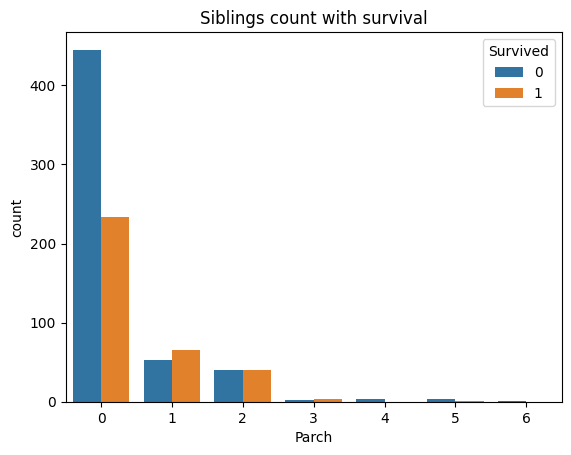

In [40]:
sns.countplot(x='Parch',hue='Survived',data=titanic_dropped)
plt.title('Siblings count with survival')
plt.show()

Insights:
- Passengers traveling alone had a higher survival rate compared to those with siblings or spouses.

### - Correlation analysis


To check the correlation between variable we need to convert categorical to numeric

In [41]:
titanic_dropped['Sex']=titanic_dropped['Sex'].map({'male':0,'female':1})

In [42]:
titanic_dropped = pd.get_dummies(titanic_dropped, columns=['Embarked'], drop_first=True)


In [43]:
titanic_dropped.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


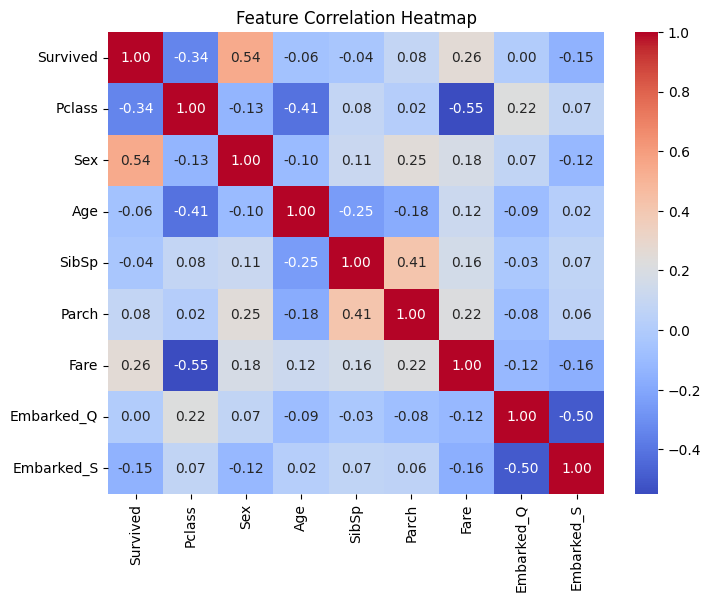

In [44]:
plt.figure(figsize=(8,6))
sns.heatmap(titanic_dropped.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


Insights from Correlation-Heatmap
- Survived:
    - Sex (0.54): There is a strong positive correlation between survival and being female. Females were more likely to survive.
    - Fare (0.26): Passengers who paid higher fares were more likely to survive, though this correlation is moderate.
    - Pclass (-0.34): There's a moderate negative correlation between survival and passenger class. Lower-class passengers (Pclass 3) had lower survival rates.
- Pclass:
    - Fare (-0.55): There's a strong negative correlation between class and fare. Passengers in lower classes (Pclass 3) paid lower fares.
    - Age (-0.41): Older passengers were more likely to be in higher classes (Pclass 1 or 2), as higher classes consists of wealthier passengers who could afford the higher fares.
- Sex:
    - Survived (0.54): As found before also, females had a higher survival rate than males.
    - Parch (0.25): Females were more likely to travel with parents or children (Parch). This suggests that families with females and children were more likely to survive.
- Age:
    - Pclass (-0.41): Older passengers were more likely to be in higher classes, which makes sense as wealthier individuals tend to be older.
    - SibSp (-0.25): Older passengers had fewer siblings or spouses aboard, possibly indicating that older passengers were more likely to travel alone or with a small group.
- Fare:
    - Survived (0.26): As mentioned, higher fare-paying passengers were more likely to survive.
    - Pclass (-0.55): Passengers in lower classes (Pclass 3) paid lower fares.
- Embarked:
    - Embarked_Q and Embarked_S (-0.50): There is a strong negative correlation between passengers embarking from Queenstown (Q) and Southampton (S). Passengers from one port were less likely to embark from the other.
